In [1]:
import numpy as np
import sklearn as skl
from sklearn import linear_model
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
 def trig_func(x):
    return -((-0.75*np.power(x, 2) + 4.71239*x - 5.9022)*np.cos(x) + (0.0833333*np.power(x, 2) - 0.523599*x + 0.803949)*np.cos(3*x) - 4.5*x + 1.5*x*np.sin(x) - 0.0555556*x*np.sin(3*x) - 2.46239*np.sin(x) + 0.424533*np.sin(3*x))/(9*np.pi)

In [3]:
x = np.arange(0, 2*np.pi, 0.005)
trig_res = trig_func(x)
poly_matrix = np.ones(shape=(len(x), 1))

for i in range(1, 5):
    poly_matrix = np.append(poly_matrix, np.power(x, i).reshape(x.size, 1), axis=1)
    
model = linear_model.Ridge(fit_intercept=False)
model.fit(poly_matrix, trig_res)
model.coef_

array([ 0.19629913, -0.00388114,  0.02390541,  0.00743951, -0.00114017])

In [4]:
def poly_func(x):
    cur = 1
    res = 0
    for coef in model.coef_:
        res += coef * cur
        cur *= x
    return res

In [5]:
poly_res = poly_func(x)

In [6]:
def orthogonal_proj_func(x):
    return 0.20019404249547249 - 0.01066466223648254 * x + 0.027284743817578543 * np.power(x, 2) + 0.006805423711959009 * np.power(x, 3) - 0.00110029250856299 * np.power(x, 4)

In [7]:
orth_poly_res = orthogonal_proj_func(x)
poly_res_mse = np.sum(np.power(trig_res - poly_res, 2))/len(x)
orth_poly_res_mse = np.sum(np.power(trig_res - orth_poly_res, 2))/len(x)

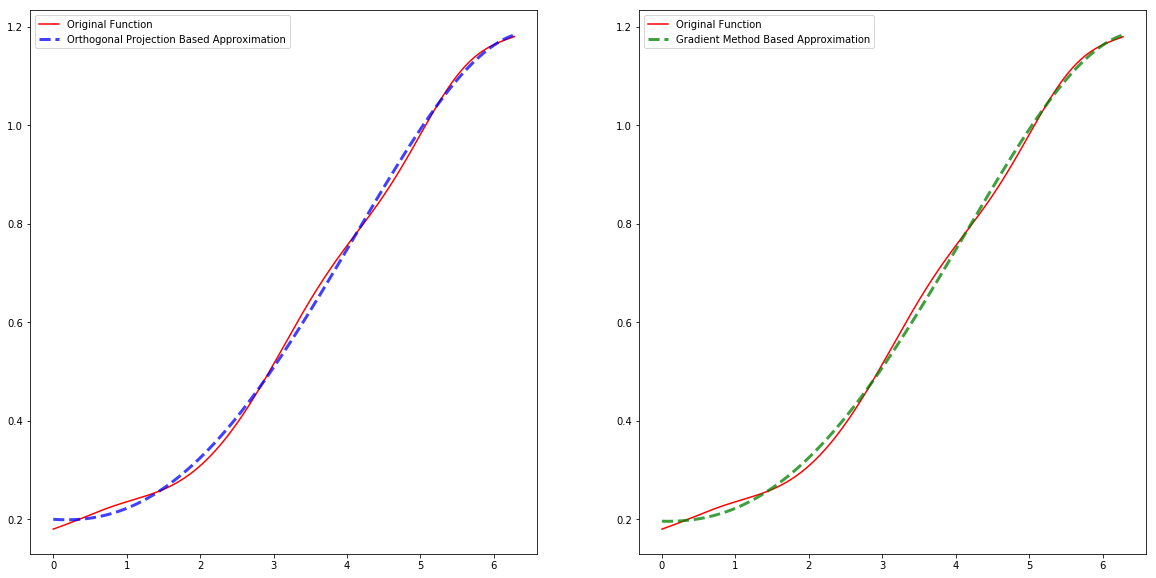

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
trig_line, = plt.plot(x, trig_res, 'r', label='Original Function')
orth_poly_line, = plt.plot(x, orth_poly_res, 'b--', alpha=0.75, linewidth=3.0, label='Orthogonal Projection Based Approximation')
plt.legend(handles=[trig_line, orth_poly_line])
plt.subplot(1, 2, 2)
trig_line, = plt.plot(x, trig_res, 'r', label='Original Function')
poly_line, = plt.plot(x, poly_res, 'g--', alpha=0.75, linewidth=3.0, label='Gradient Method Based Approximation')
plt.legend(handles=[trig_line, poly_line])
plt.show()

In [9]:
print('Gradient based method MSE:', poly_res_mse)
print('Orthogonal projection based method MSE', orth_poly_res_mse)

Gradient based method MSE: 0.000140220723939
Orthogonal projection based method MSE 0.00013953159374
